#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [19]:
# Write your code here

from google.colab import files
uploaded = files.upload()



Saving Assignment 2 dataset.csv to Assignment 2 dataset (2).csv


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

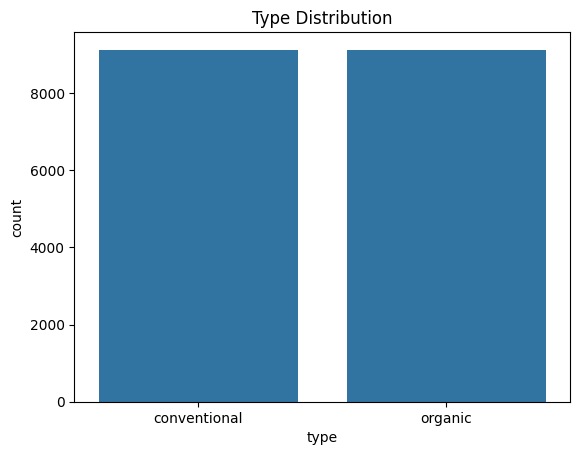

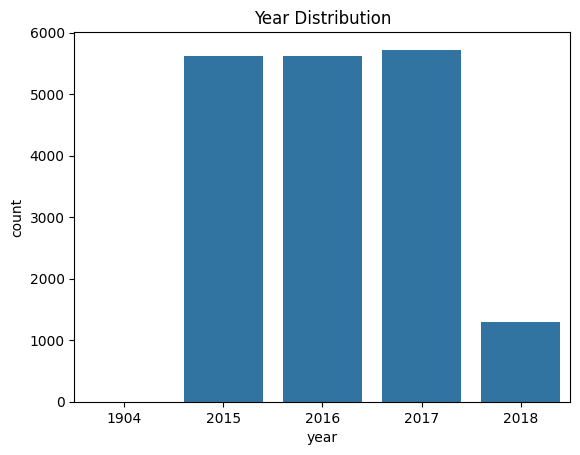

region
WestTexNewMexico       340
Albany                 338
BaltimoreWashington    338
Boise                  338
Boston                 338
Atlanta                338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
BuffaloRochester       338
LasVegas               338
LosAngeles             338
MiamiFtLauderdale      338
Louisville             338
Nashville              338
NewOrleansMobile       338
NewYork                338
Midsouth               338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [8]:
# Write your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Assignment 2 dataset.csv')

# Plot Type distribution
sns.countplot(x='type', data=df)
plt.title('Type Distribution')
plt.show()

# Plot Year distribution
sns.countplot(x='year', data=df)
plt.title('Year Distribution')
plt.show()

# Check Region distribution
print(df['region'].value_counts())


1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [9]:
#import pandas as pd

import pandas as pd

# Load the dataset
df = pd.read_csv('Assignment 2 dataset.csv')

# 1. Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 2. Check for missing values per column
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)



Number of duplicate rows: 2

Missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [10]:
# Write your code here
# Print the number of rows and columns
print(f"Dataset Shape: {df.shape}")

# Interpretation:

# There are more than 18,000 rows in the dataset. In most cases, this size is adequate for training
# conventional machine learning algorithms (such as Random Forest or Linear Regression) can accurately forecast avocado prices.


Dataset Shape: (18254, 14)


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [11]:
# Write your code here
# Remove the first column
df = df.drop(df.columns[0], axis=1)

# Convert 'year' column to string type
df['year'] = df['year'].astype(str)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18254 non-null  object 
 1   AveragePrice  18254 non-null  float64
 2   Total Volume  18253 non-null  float64
 3   4046          18252 non-null  float64
 4   4225          18253 non-null  float64
 5   4770          18253 non-null  float64
 6   Total Bags    18253 non-null  float64
 7   Small Bags    18252 non-null  float64
 8   Large Bags    18252 non-null  float64
 9   XLarge Bags   18253 non-null  float64
 10  type          18253 non-null  object 
 11  year          18254 non-null  object 
 12  region        18254 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.8+ MB
None


2.2 Check for duplicate values and remove them.

In [12]:
# Write your code here
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Remove them
df = df.drop_duplicates()

Duplicates: 2


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [13]:
# Write your code here
# Drop rows that have mostly missing values (keeping rows with at least half the data)
df = df.dropna(thresh=len(df.columns)/2)

# Fill missing numbers with the median of their specific 'region'
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    df[col] = df[col].fillna(df.groupby('region')[col].transform('median'))

# Check if any are left
print(df.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


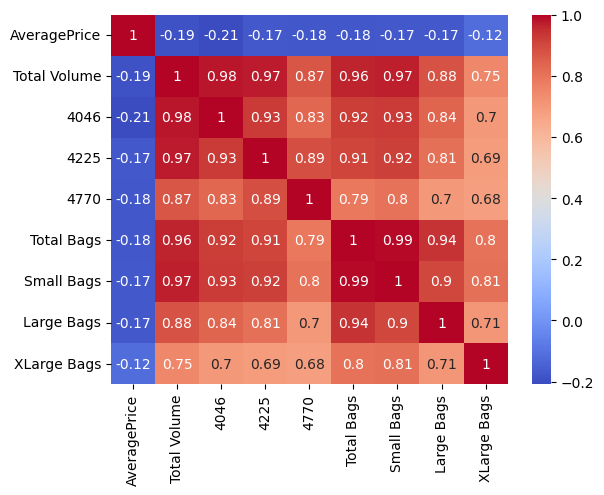

In [14]:
# Write your code here
# Show correlation for numbers
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Interpretation:
# High correlation (close to 1 or -1) means variables move together.
# If two input variables are highly correlated, it might confuse the model
# because it can't tell which one is actually affecting results.

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [15]:
# Write your code here
# Continuous stats (mean, median, min, max)
print(df.describe())

# Categorical unique values
cats = df.select_dtypes(include='object').columns
for col in cats:
    print(f"\n{col} unique values:")
    print(df[col].unique())

       AveragePrice  Total Volume          4046          4225          4770  \
count  18251.000000  1.825100e+04  1.825100e+04  1.825100e+04  1.825100e+04   
mean       1.406020  8.505523e+05  2.929840e+05  2.951225e+05  2.283727e+04   
std        0.402675  3.453367e+06  1.264922e+06  1.204058e+06  1.074584e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.084067e+04  8.543500e+02  3.008325e+03  0.000000e+00   
50%        1.370000  1.073542e+05  8.645300e+03  2.905673e+04  1.849900e+02   
75%        1.660000  4.329430e+05  1.110375e+05  1.501258e+05  6.240690e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags  
count  1.825100e+04  1.825100e+04  1.825100e+04   18251.000000  
mean   2.396140e+05  1.821784e+05  5.433233e+04    3106.086096  
std    9.861913e+05  7.461393e+05  2.439532e+05   17691.955036  
min    0.000000e+00  0.00000

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [16]:
# Write your code here
# Ensure Date format
df['Date'] = pd.to_datetime(df['Date'])

# Find earliest
earliest = df['Date'].min()
print("Earliest Date:", earliest)

# Check for data before 2011 (e.g., 2010 or older)
old_data = df[df['Date'].dt.year <= 2010]
print("Rows before 2011:", len(old_data))

# Comment:
# If the earliest date is older than the rest (like 2005 vs 2015), it might be an error.
# If it looks like a valid historical record , better to keep it. Otherwise, drop it.


Earliest Date: 1904-01-21 00:00:00
Rows before 2011: 1


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
# Find max price
max_price = df['AveragePrice'].max()
print("Highest Price:", max_price)

# Find the region for that price
print(df[df['AveragePrice'] == max_price][['region', 'Date']])


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [17]:
# Write your code here
# Find max volume
max_vol = df['Total Volume'].max()
print("Highest Volume:", max_vol)

# Find the region
print(df[df['Total Volume'] == max_vol][['region', 'Date']])

Highest Volume: 62505646.52
       region       Date
9097  TotalUS 2018-02-04
